In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [11]:
%matplotlib inline

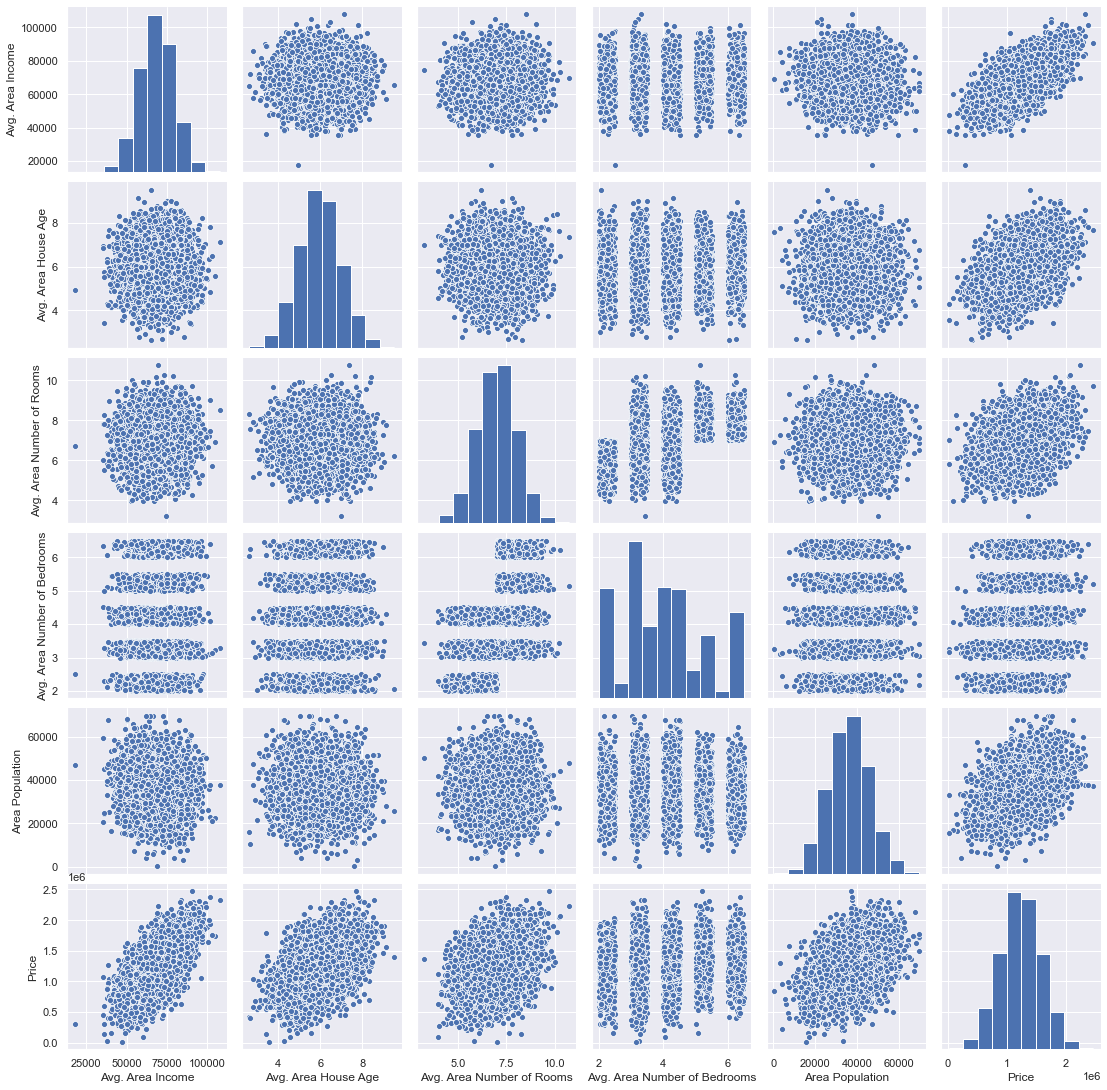

In [12]:
sns.pairplot(df)

<AxesSubplot:xlabel='Price'>

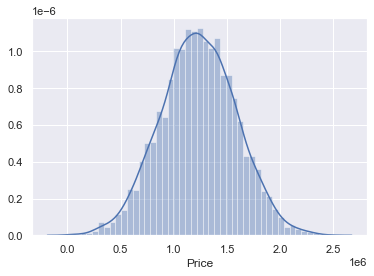

In [13]:
sns.distplot(df['Price'])

In [14]:
df['Price'].mean()

1232072.65414236

<AxesSubplot:>

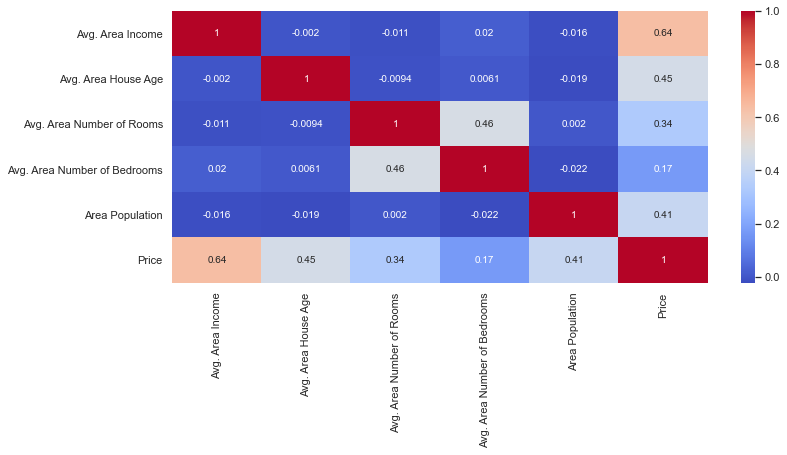

In [15]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

# Training the model

In [17]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Seperate the dependent & independent variables

In [18]:
X= df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=df['Price']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X_train.shape

(4000, 5)

In [23]:
X_test.shape

(1000, 5)

In [24]:
df.shape

(5000, 7)

# Creating & training model

In [27]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

# Evaluation

In [28]:
print(lm.intercept_)

-2635072.900933357


In [29]:
print(lm.coef_)

[2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]


In [34]:
coeff_df= pd.DataFrame(lm.coef_, index= X.columns,columns=['coefficients'])

In [35]:
coeff_df

,coefficients
Avg. Area Income,21.652206
Avg. Area House Age,164666.480722
Avg. Area Number of Rooms,119624.012232
Avg. Area Number of Bedrooms,2440.377611
Area Population,15.270313


# Prediction

In [37]:
y_pred= lm.predict(X_test)

In [38]:
y_pred

array([1308587.92699759, 1237037.22949434, 1243429.34030681,
       1228900.2136037 , 1063320.9071083 , 1544058.05034861,
       1094774.70493019,  833284.72339225,  788412.85578719,
       1469714.86615709,  671728.43662062, 1606818.21977961,
       1004166.61331065, 1796798.9759592 , 1288566.96221027,
       1087782.93301076, 1423072.37492533, 1078178.68169677,
        802286.03537898,  930761.0369571 , 1134829.86477822,
        916398.42023144, 1489972.69335433, 1284580.15538816,
       1582071.35322737, 1132519.15991992, 1089888.39644517,
        974510.51872155,  924057.96820648, 1740759.72092282,
       1286481.59512311, 1621289.95171608, 1435264.20161719,
       1234014.77924477, 1485434.57300368, 1718335.00753702,
       1538953.74882858,  777106.64791791, 1765201.5224362 ,
       1175972.14199818, 1553707.94323485,  897703.67505179,
       1371049.80326609,  845281.72310359, 1201022.89803888,
       1133285.98450866, 1363128.14557346, 1449814.08768277,
       1574363.90467358,

In [39]:
y_test

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
4711    1.107031e+06
2313    1.405505e+06
3214    1.924156e+06
2732    1.571254e+06
1926    8.831475e+05
Name: Price, Length: 1000, dtype: float64

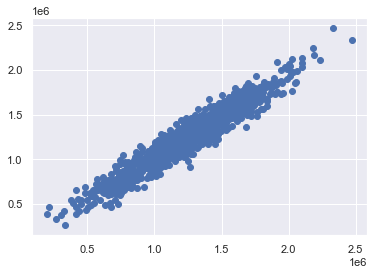

In [40]:
plt.scatter(y_test,y_pred)

# Evaluation metrices

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [46]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'R-Squared:{r2_score(y_test, y_pred)}')

Mean Absolute Error: 80879.09723489823
Mean Squared Error: 10089009300.89452
Root Mean Squared Error: 100444.06055558745
R-Squared:0.9179971706834289


#### Evaluation Done